>머신러닝과 데이터분석 A-Z 올인원 패키지 Online :『고객데이터 분석 강좌』 를 참조한 notebook

# <데이터 정보>
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

- Source : Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.(원문) : https://archive.ics.uci.edu/ml/datasets/Online+Retail#


# <데이터 명세>

1. InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
2. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
3. Description: Product (item) name. Nominal.
4. Quantity: The quantities of each product (item) per transaction. Numeric.
5. InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
6. UnitPrice: Unit price. Numeric, Product price per unit in sterling.
7. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
8. Country: Country name. Nominal, the name of the country where each customer resides.

-----------------------------

# 0. 기본 설정

In [43]:
import pandas as pd
import numpy as np
from pandas import Series
from pandas import DataFrame
import missingno as msno
import seaborn as sns
COLORS = sns.color_palette()

%matplotlib inline

import matplotlib.pyplot as plt

In [3]:
import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

# 1. 데이터불러오기

In [38]:
retail = pd.read_excel('./data/OnlineRetail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### ▼ 기본 조회

In [39]:
retail.info()
print(retail.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
(541909, 8)


In [12]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

-------------------------------

# 2. 데이터 전처리 (데이터 클렌징)

1. null 데이터 처리
  - CustomerID 
- Business 로직에 맞지 않은 데이터 처리
  - 음수의 아이템 수량
  - 가격이 0원 
- 데이터 타입 변경

In [42]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

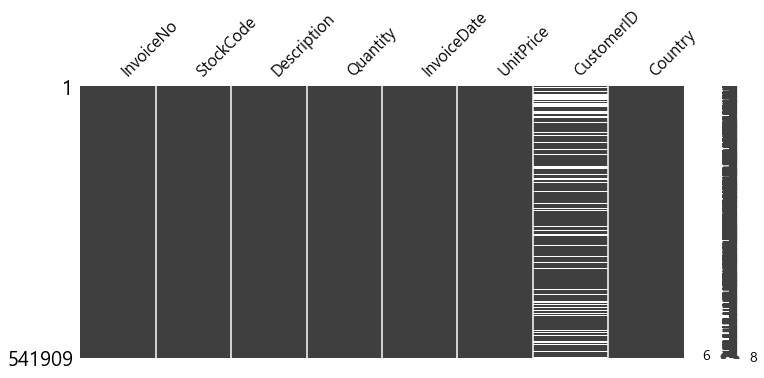

In [41]:
# 결측치 시각화 
msno.matrix(retail, figsize=(12,5))

▶ CustomerID, Description 칼럼에 많은 결측치가 존재 함

#### 1.null customerID 제거

In [25]:
# 일반적으로 많이 쓰는 dropna가 아닌 다른 방법 -> 어쨌든 결측치 있는 행은 삭제됨
retail = retail[pd.notnull(retail['CustomerID'])]
retail.shape

(406829, 8)

In [23]:
retail[pd.notnull(retail['CustomerID'])]['CustomerID'].isnull().sum()

0

#### 2. 비지니스 로직에 맞지 않은 데이터 제거

In [27]:
retail = retail[retail['Quantity'] > 0]
retail = retail[retail['UnitPrice'] > 0]
len(retail)

397884

In [28]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [29]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


### ▼데이터 타입 변경
 - 메모리 효율화
 - 올바른 데이터 타입 매칭

In [35]:
retail['CustomerID'] = retail['CustomerID'].astype(int)
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


-------------------------------

# 2. 매출 분석

#### 해당 기간 동안의 매출
 - ① 전체 매출
 - ② 국가별 매출
 - ③ 월별 매출
 - ④ 요일별 매출
 - ⑤ 시간별 매출

### ▼①전체 매출
- CheckoutPrice(총 비용 지출) = Quantity * UnitPrice    
- (근데 왜 유닛이 실수 단위냐;)

In [52]:
retail['CheckoutPrice'] = retail['UnitPrice'] * retail['Quantity']
retail.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


In [76]:
total_revenue = retail['CheckoutPrice'].sum()
total_revenue

9747747.933999998

### ▼②국가별 매출

In [57]:
CheckoutPrice_country = retail.groupby('Country').sum()['CheckoutPrice'].sort_values()
CheckoutPrice_country

Country
Saudi Arabia            1.311700e+02
Bahrain                 5.484000e+02
Czech Republic          7.077200e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.291750e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
USA                     1.730920e+03
United Arab Emirates    1.902280e+03
Malta                   2.505470e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Greece                  4.710520e+03
Unspecified             4.749790e+03
Poland                  7.213140e+03
Israel                  7.907820e+03
Singapore               9.120390e+03
Hong Kong               1.011704e+04
Austria                 1.015432e+04
Cyprus                  1.294629e+04
Italy                   1.689051e+04
Denmark                 1.876814e+04
Channel Islands         2.008629e+04
Finland                 2.232674e+04
Portugal                2.936702e+04
Norway                  3.5163

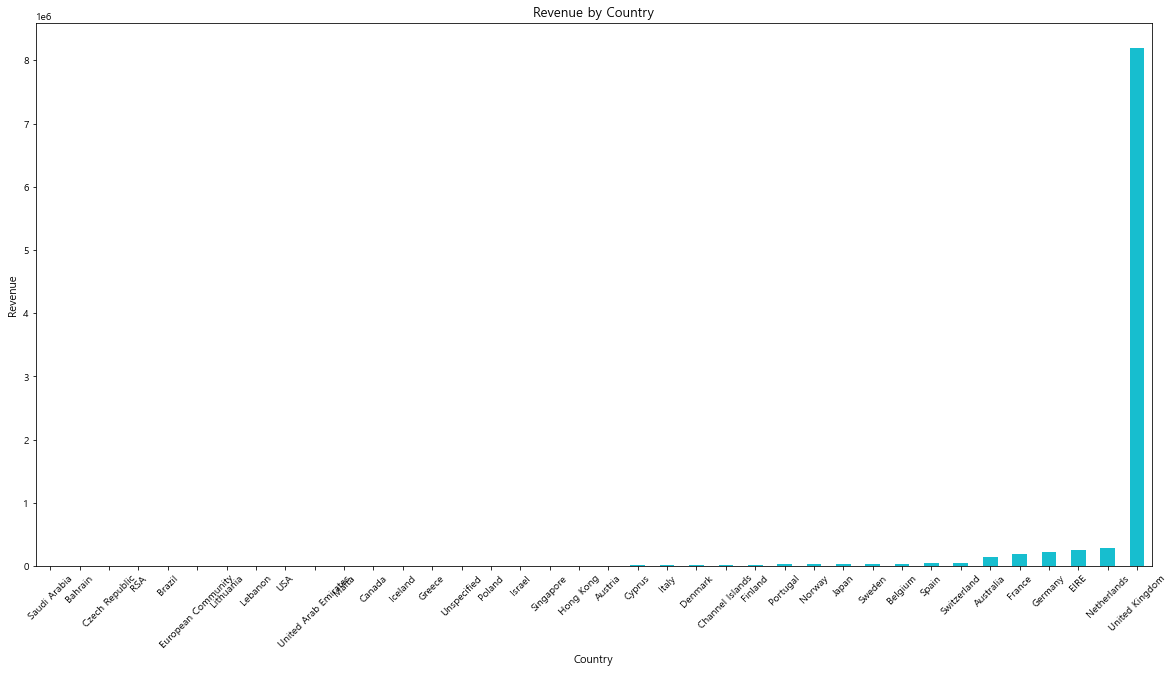

In [67]:
plot = CheckoutPrice_country.plot(kind='bar', color=COLORS[-1], figsize=(20, 10))
plot.set_xlabel('Country', fontsize=11)
plot.set_ylabel('Revenue', fontsize=11)
plot.set_title('Revenue by Country', fontsize=13)
plot.set_xticklabels(labels=CheckoutPrice_country.index, rotation=45)
plt.show()

In [74]:
# 퍼센트로 표현
pd.DataFrame((CheckoutPrice_country / total_revenue * 100).sort_values(ascending=False))

,CheckoutPrice
Country,
United Kingdom,83.996903
Netherlands,2.920280
EIRE,2.700899
Germany,2.274353
France,2.025123
Australia,1.406246
Switzerland,0.578445
Spain,0.561920
Belgium,0.419697


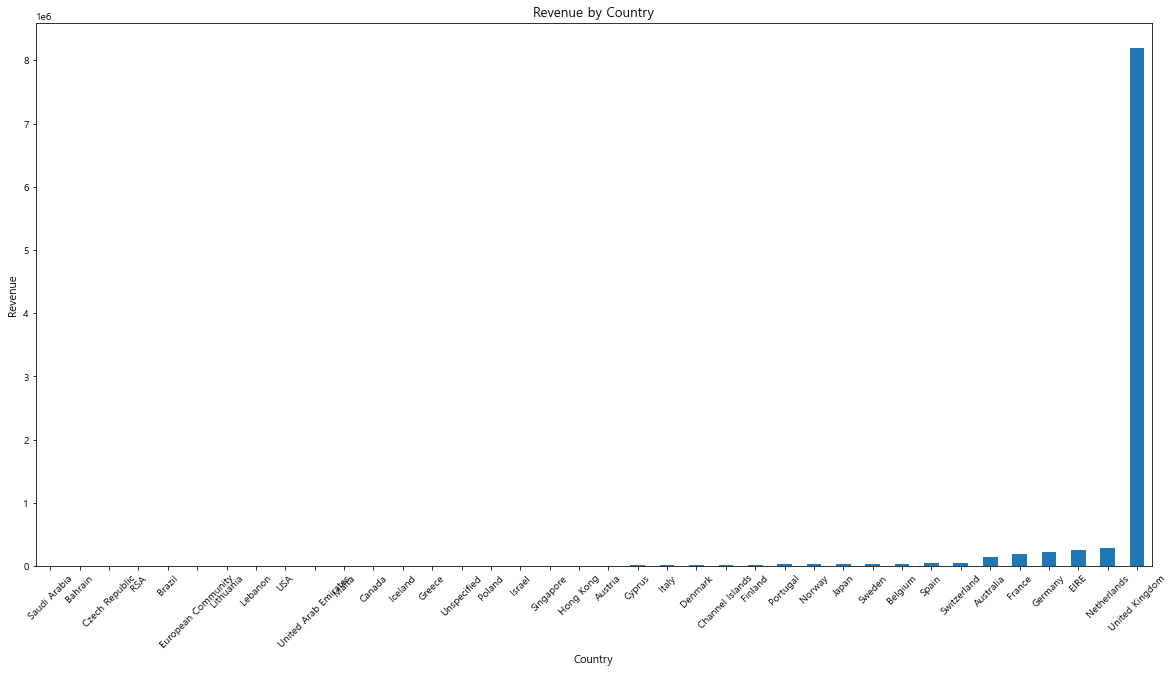

In [75]:
def plot_bar(df, xlabel, ylabel, title, color=COLORS[0], figsize=(20, 10), rotation=45):
    plot = df.plot(kind='bar', color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)
                   
plot_bar(CheckoutPrice_country, 'Country', 'Revenue', 'Revenue by Country')

### ▼③월별 매출

In [77]:
retail['InvoiceDate'].sort_values(ascending=False)

541908   2011-12-09 12:50:00
541900   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541895   2011-12-09 12:50:00
541896   2011-12-09 12:50:00
                 ...        
4        2010-12-01 08:26:00
3        2010-12-01 08:26:00
2        2010-12-01 08:26:00
1        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [81]:
def extract_month(date):
    month = str(date.month)
    if date.month < 10:
        month = '0' + month
    return str(date.year) + month 

In [107]:
# 함수 호출 말이 안된다....★★★★★★★★★★★★★★★★★★★
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
rev_by_month

201012     748957.020
201101     560000.260
201102     498062.650
201103     683267.080
201104     493207.121
201105     723333.510
201106     691123.120
201107     681300.111
201108     682680.510
201109    1019687.622
201110    1070704.670
201111    1461756.250
201112     433668.010
Name: CheckoutPrice, dtype: float64

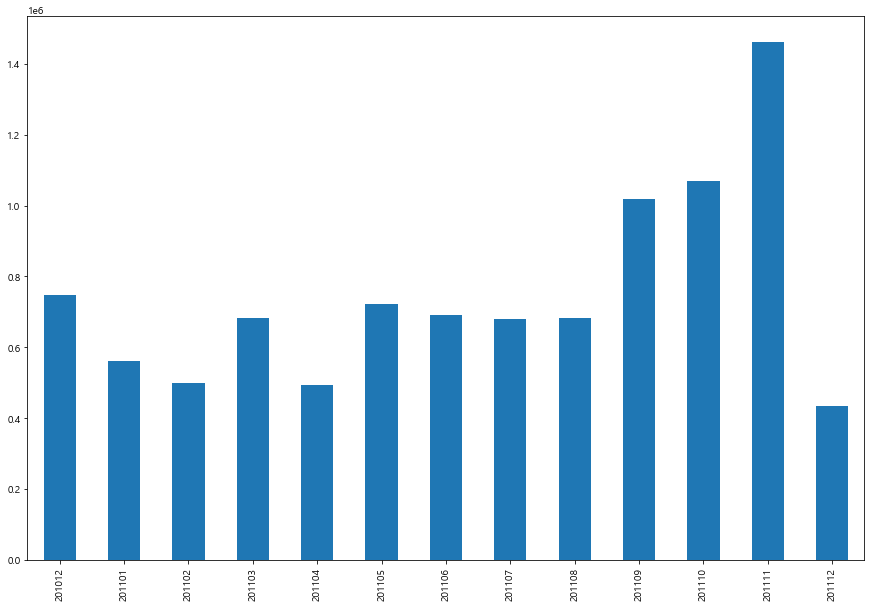

In [129]:
plt.figure(figsize=(15,10))
rev_by_month.plot.bar()

#### ▼seaborn 으로 그리기

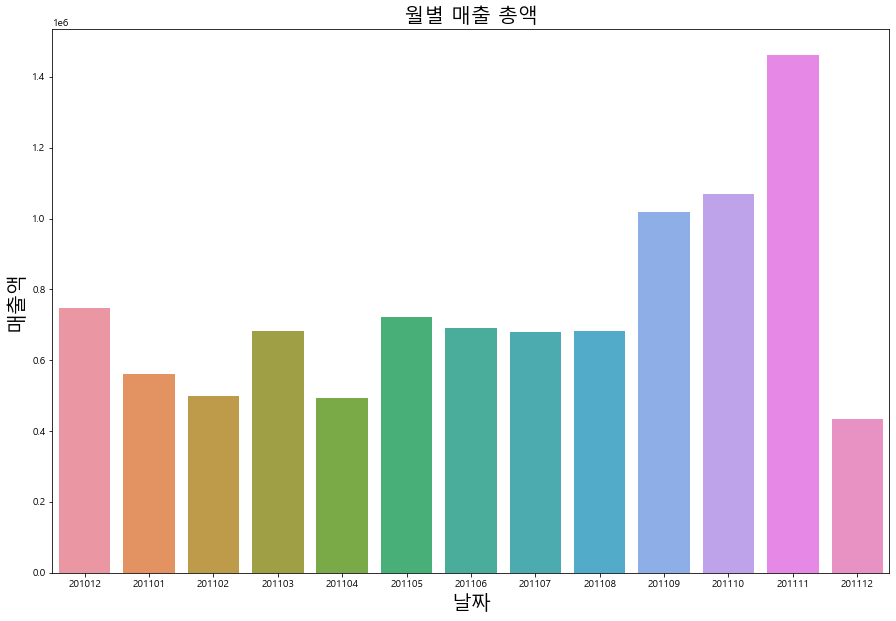

In [128]:
plt.figure(figsize=(15,10))
sns.barplot(data=pd.DataFrame(rev_by_month), x=pd.DataFrame(rev_by_month).index, y='CheckoutPrice')
plt.title('월별 매출 총액', fontsize=20)
plt.ylabel('매출액', fontsize=20)
plt.xlabel('날짜', fontsize=20)
plt.show()

#### ▼④요일별 매출

In [191]:
rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['CheckoutPrice']
rev_by_dow
# 0~6 : 월~일

0    1588609.431
1    1966182.791
2    1734147.010
3    2112519.000
4    1540610.811
6     805678.891
Name: CheckoutPrice, dtype: float64

In [192]:
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]
rev_by_dow

Mon     1588609.431
Tue     1966182.791
Wed     1734147.010
Thur    2112519.000
Fri     1540610.811
Sun      805678.891
Name: CheckoutPrice, dtype: float64

In [198]:
pd.DataFrame(rev_by_dow)

,CheckoutPrice
Mon,1588609.431
Tue,1966182.791
Wed,1734147.010
Thur,2112519.000
Fri,1540610.811
Sun,805678.891


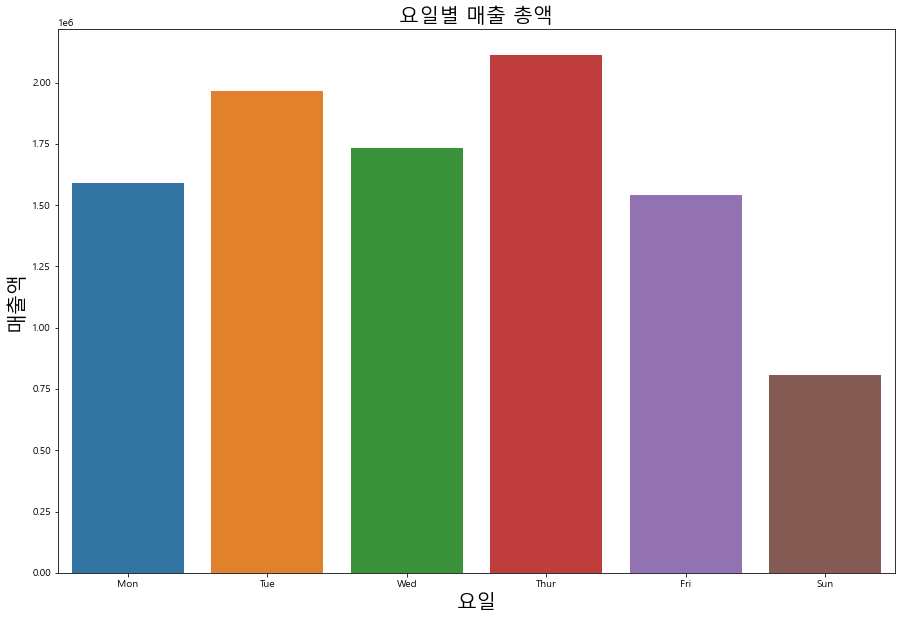

In [200]:
plt.figure(figsize=(15,10))
sns.barplot(data=pd.DataFrame(rev_by_dow), x=pd.DataFrame(rev_by_dow).index, y='CheckoutPrice')
plt.title('요일별 매출 총액', fontsize=20)
plt.ylabel('매출액', fontsize=20)
plt.xlabel('요일', fontsize=20)
# plt.xticks(pd.DataFrame(rev_by_dow).index,fontsize=20)
plt.show()

요일 추출하기

In [142]:
date = pd.DataFrame({'inputDate':['2021-01-01']}) 
date['inputDate'] = pd.to_datetime(date['inputDate']) 
date['dayOfWeek'] = date['inputDate'].dt.day_name() 
  
date 

,inputDate,dayOfWeek
0,2021-01-01,Friday


In [145]:
retail['dayOfWeek'] = retail['InvoiceDate'].dt.day_name()

In [147]:
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,dayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday


In [153]:
retail.groupby('dayOfWeek')['CheckoutPrice'].sum()

dayOfWeek
Friday       1540610.811
Monday       1588609.431
Sunday        805678.891
Thursday     2112519.000
Tuesday      1966182.791
Wednesday    1734147.010
Name: CheckoutPrice, dtype: float64

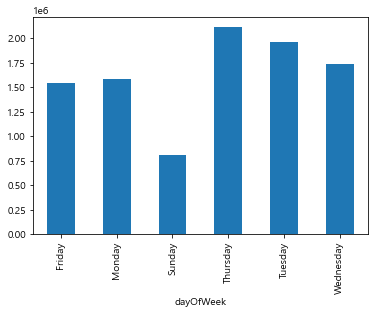

In [152]:
retail.groupby('dayOfWeek')['CheckoutPrice'].sum().plot.bar()

- ▶ 요일 알파벳순으로 정렬됨
- ▶ 아래 개선

In [160]:
retail['InvoiceDate'].dt.dayofweek 

0         2
1         2
2         2
3         2
4         2
         ..
541904    4
541905    4
541906    4
541907    4
541908    4
Name: InvoiceDate, Length: 541909, dtype: int64

In [171]:
retail_day = retail.copy()

In [176]:
retail_day['요일'] = retail_day['InvoiceDate'].dt.dayofweek 
retail_day.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,dayOfWeek,요일
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2


In [173]:
retail_day_rev = retail_day.groupby('요일')['CheckoutPrice'].sum()
retail_day_rev.index=['월', '화', '수', '목', '금', '일']
retail_day_rev

월    1588609.431
화    1966182.791
수    1734147.010
목    2112519.000
금    1540610.811
일     805678.891
Name: CheckoutPrice, dtype: float64

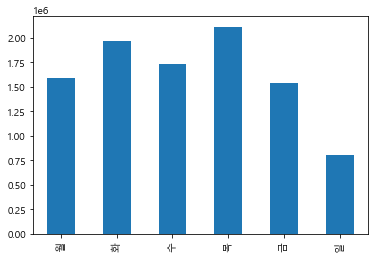

In [175]:
retail_day_rev.plot.bar()

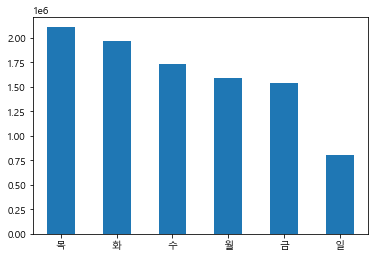

In [180]:
retail_day_rev.sort_values(ascending=False).plot.bar(rot=0)

#### ▼⑤시간별 매출

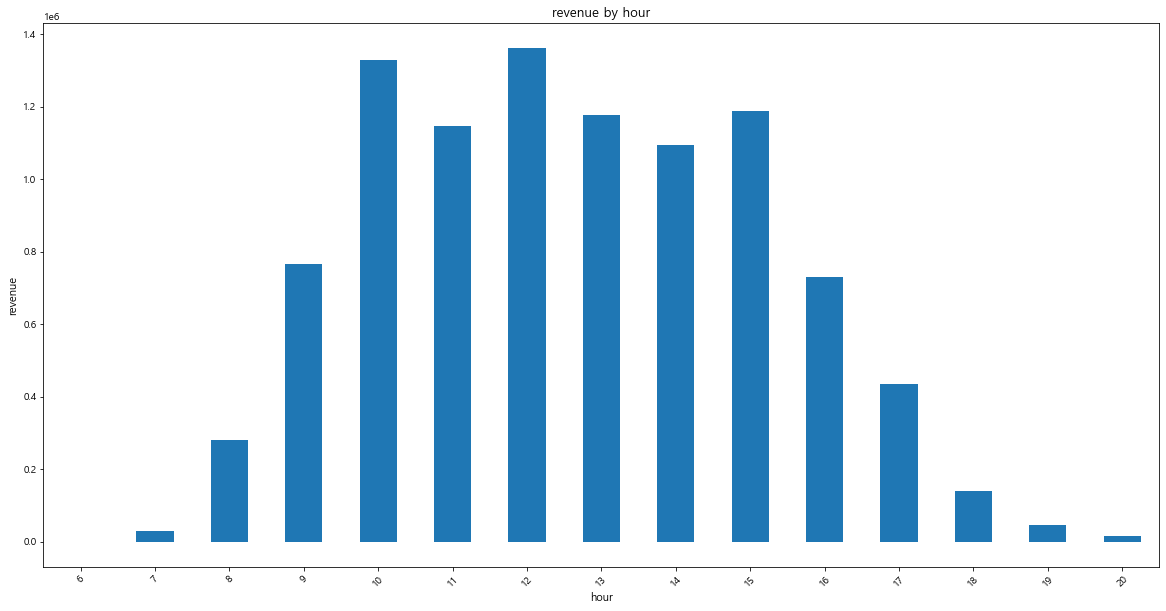

In [181]:
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['CheckoutPrice']
plot_bar(rev_by_hour, 'hour', 'revenue', 'revenue by hour')

In [203]:
rev_by_hour_frame = pd.DataFrame(rev_by_hour)
rev_by_hour_frame

,CheckoutPrice
6,-497.350
7,31009.320
8,281840.860
9,766734.051
10,1329056.521
11,1147437.920
12,1362484.290
13,1177506.370
14,1095212.901
15,1189458.280


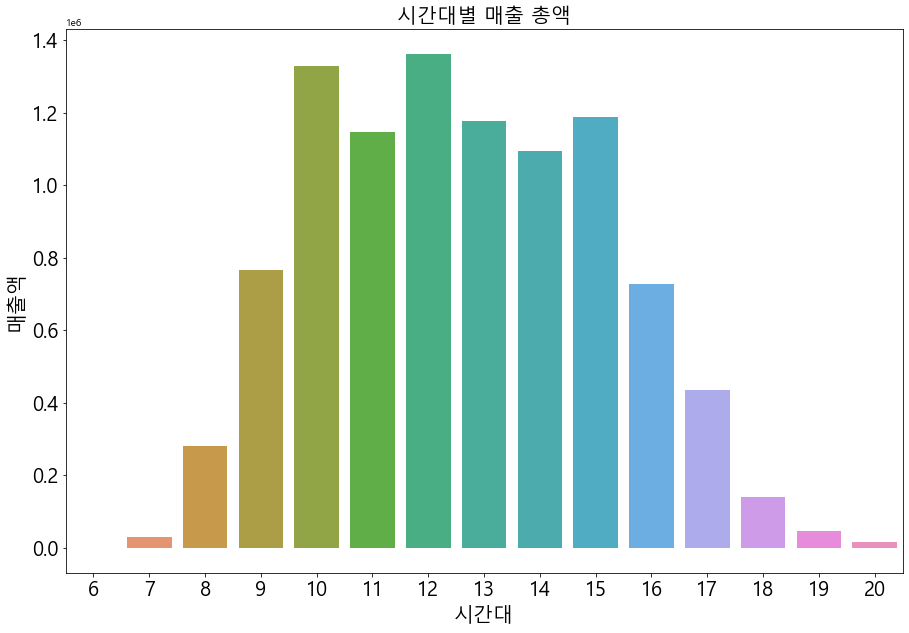

In [210]:
plt.figure(figsize=(15,10))
sns.barplot(data=rev_by_hour_frame, x=rev_by_hour_frame.index, y='CheckoutPrice')
plt.title('시간대별 매출 총액', fontsize=20)
plt.ylabel('매출액', fontsize=20)
plt.xlabel('시간대', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()